In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def area_finder(height1, height2, width):
    area = (height1)*(width)*(1/2) + (height2*width)
    return area

In [3]:
a = 198
b = 95
c = 22
print(area_finder(a, b, c))
print(area_finder(a, b, c) - b*c)

4268.0
2178.0


In [4]:
4268-2178, 3526-1398

(2090, 2128)

## ------

In [5]:
ha_list = [('8133-12705', 0.130943), ('8256-12704', 0.12611), ('8616-3703', 0.135063),
             ('8720-12702', 0.134953), ('8721-3701', 0.118101)]
#('8137-9101', 0.118865),

ha_list_uncertain = ['8155-6103(?)', '8254-6103(?)', '8338-12705(?)', '8606-12704(?)']

ha_list2 = [('7815-6103', 0.135043), ('7991-12705', 0.113153), ('7992-9102', 0.119399), ('8132-6101', 0.129403),
             ('8132-12703', 0.116056), ('8133-12704', 0.134471), ('8137-3702', 0.131997),
             ('8143-6101', 0.126168), ('8244-12704', 0.115137), ('8318-6102', 0.12908), ('8329-6102', 0.142887),
             ('8439-3703', 0.138619), ('8448-3703', 0.138746), ('8464-6101', 0.125582), ('9049-1901', 0.131457)]

obj1_43214 = [('8135-1902', 0.117997)]

ha_list2_uncertain = ['8454-6102(?)', '8552-9102(?)', '8717-1902(?)']

In [6]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

In [7]:
ha_lum_dist = [615.1, 590.5, 636.1, 635.6, 550.2]

In [8]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['D_L Mpc'] = ha_lum_dist
# csv_input.to_csv('ha_list.csv', index=False)

In [9]:
ha_table_1 = pd.read_csv('ha_list.csv')

In [10]:
lum_dist = ha_table_1['D_L Mpc']
flux = ha_table_1['flux']

lum_dist_cm = []
luminosity = []

for i in range(len(lum_dist)):
    lum_dist_cm.append(Mpc_to_cm(lum_dist[i]))
    luminosity.append(luminosity_calc(Mpc_to_cm(lum_dist[i]), flux[i]))

In [11]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['L erg/s'] = luminosity
# csv_input.to_csv('ha_list.csv', index=False)

In [47]:
# ha_table_1

In [13]:
ha_lum_dist2 = [636.0, 525.4, 556.7, 607.3, 539.9, 633.1, 
                620.5, 590.8, 535.3, 605.6, 676.3, 654.3,
                655.0, 587.9, 617.7]

In [14]:
# csv_input = pd.read_csv('ha_list2.csv')
# csv_input['D_L Mpc'] = ha_lum_dist2
# csv_input.to_csv('ha_list2.csv', index=False)

In [15]:
ha_table_2 = pd.read_csv('ha_list2.csv')

In [16]:
lum_dist_2 = ha_table_2['D_L Mpc']
flux_2 = ha_table_2['flux']

lum_dist_cm_2 = []
luminosity_2 = []

for i in range(len(lum_dist_2)):
    lum_dist_cm_2.append(Mpc_to_cm(lum_dist_2[i]))
    luminosity_2.append(luminosity_calc(Mpc_to_cm(lum_dist_2[i]), flux_2[i]))

In [17]:
# csv_input = pd.read_csv('ha_list2.csv')
# csv_input['L erg/s'] = luminosity_2
# csv_input.to_csv('ha_list2.csv', index=False)

In [46]:
# ha_table_2

# DAP -- Table 1

In [19]:
DAP = pd.read_csv('/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/Data/DAP.csv', sep=',')

In [20]:
DAP1 = DAP.copy()

In [21]:
idx = [24, 49, 120, 134, 138]
given_lum_dist = []
for i in range(len(ha_list)):
    given_lum_dist.append((DAP.loc[DAP['plateifu'] == ha_list[i][0]])['ldist_nsa_z'][idx[i]])

In [22]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['Given D_L Mpc'] = given_lum_dist
# csv_input.to_csv('ha_list.csv', index=False)
# ha_table_1 = pd.read_csv('ha_list.csv')

In [49]:
# ha_table_1.rename(columns = {'Given L erg/s':'Given D_L Mpc'}, inplace = True)

In [24]:
given_flux = []
for i in range(len(ha_list)):
    given_flux.append((DAP.loc[DAP['plateifu'] == ha_list[i][0]])['emline_sflux_tot_ha_6564'][idx[i]])

In [56]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['Given flux'] = given_flux
# csv_input.to_csv('ha_list.csv', index=False)
# ha_table_1 = pd.read_csv('ha_list.csv')
# ha_table_1

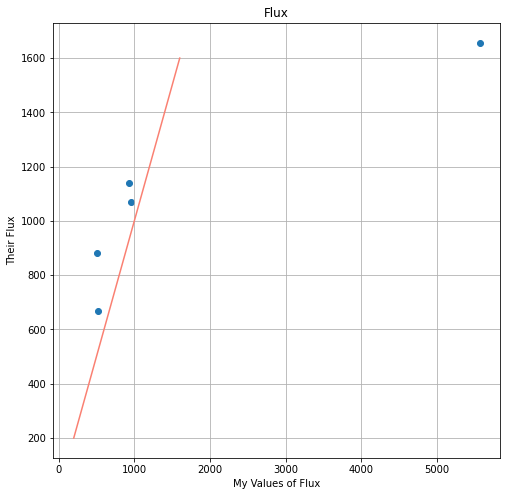

In [58]:
plt.figure(figsize = (8,8))
plt.grid()
# plt.xlim(350,650)
# plt.ylim(350,650)
plt.xlabel('My Values of Flux')
plt.ylabel('Their Flux')
plt.title('Flux')
plt.plot([200,1600], [200,1600], color = 'salmon')
plt.scatter(ha_table_1['flux'], ha_table_1['Given flux'])

In [54]:
their_lum = []
for i in range(len(idx)):
    their_lum.append(luminosity_calc(ha_table_1['D_L cm'][i], ha_table_1['Given flux'][i]))

In [55]:
# csv_input = pd.read_csv('ha_list.csv')
# csv_input['Their Lum'] = their_lum
# csv_input.to_csv('ha_list.csv', index=False)
# ha_table_1 = pd.read_csv('ha_list.csv')
ha_table_1

,mangaid,plateifu,nsa_z,flux,D_L Mpc,D_L cm,L erg/s,Given L erg/s,Given flux,Their Lum
0,1-377841,8133-12705,0.130943,934.712571,615.1,1.898002e+27,4.231372e+41,430.5657,1138.4650,5.153743e+41
1,1-558912,8256-12704,0.126110,504.760943,590.5,1.822094e+27,2.105897e+41,413.3847,880.6425,3.674101e+41
2,1-180308,8616-3703,0.135063,5559.944176,636.1,1.962801e+27,2.691738e+42,445.2860,1656.7860,8.021006e+41
3,1-351719,8720-12702,0.134953,526.323773,635.6,1.961258e+27,2.544090e+41,444.8922,668.3733,3.230714e+41
4,1-47511,8721-3701,0.118101,957.464724,550.2,1.697741e+27,3.467972e+41,385.1212,1069.3070,3.873069e+41


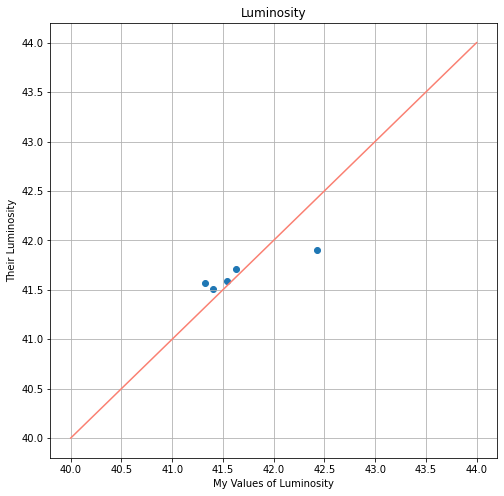

In [65]:
plt.figure(figsize = (8,8))
plt.grid()
# plt.xlim(350,650)
# plt.ylim(350,650)
plt.xlabel('My Values of Luminosity')
plt.ylabel('Their Luminosity')
plt.title('Luminosity')
plt.plot([40,44], [40,44], color = 'salmon')
plt.scatter(np.log10(ha_table_1['L erg/s']), np.log10(ha_table_1['Their Lum']))

# DAP -- Table 2

In [30]:
idx2 = [3, 6, 8, 21, 19, 23, 31, 34, 42, 54, 58, 67, 73, 84, 165]
given_lum_dist2 = []
for i in range(len(ha_list2)):
#     print(DAP.loc[DAP['plateifu'] == ha_list2[i][0]])
    given_lum_dist2.append((DAP.loc[DAP['plateifu'] == ha_list2[i][0]])['ldist_nsa_z'][idx2[i]])

In [34]:
# csv_input = pd.read_csv('ha_list2.csv')
# csv_input['Given D_L Mpc'] = given_lum_dist2
# csv_input.to_csv('ha_list2.csv', index=False)
# ha_table_2 = pd.read_csv('ha_list2.csv')
# ha_table_2

In [33]:
given_flux2 = []
for i in range(len(ha_list2)):
    given_flux2.append((DAP.loc[DAP['plateifu'] == ha_list2[i][0]])['emline_sflux_tot_ha_6564'][idx2[i]])

In [69]:
# csv_input = pd.read_csv('ha_list2.csv')
# csv_input['Given flux'] = given_flux2
# csv_input.to_csv('ha_list2.csv', index=False)
# ha_table_2 = pd.read_csv('ha_list2.csv')
# ha_table_2

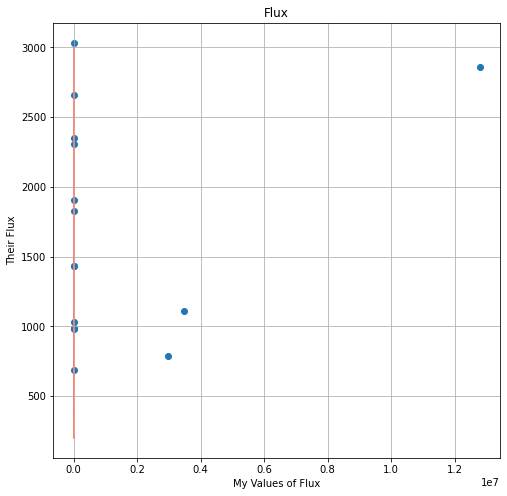

In [45]:
plt.figure(figsize = (8,8))
plt.grid()
# plt.xlim(0,5000)
# plt.ylim(350,650)
plt.xlabel('My Values of Flux')
plt.ylabel('Their Flux')
plt.title('Flux')
plt.plot([200,3000], [200,3000], color = 'salmon')
plt.scatter(ha_table_2['flux'], ha_table_2['Given flux'])

In [66]:
their_lum2 = []
for i in range(len(idx2)):
    their_lum2.append(luminosity_calc(ha_table_2['D_L cm'][i], ha_table_2['Given flux'][i]))

In [68]:
# csv_input = pd.read_csv('ha_list2.csv')
# csv_input['Their Lum'] = their_lum2
# csv_input.to_csv('ha_list2.csv', index=False)
# ha_table_2 = pd.read_csv('ha_list2.csv')
ha_table_2

,mangaid,plateifu,nsa_z,flux,D_L Mpc,D_L cm,L erg/s,Given D_L Mpc,Given flux,Their Lum
0,1-113521,7815-6103,0.135043,1.823267e+03,636.0,1.962492e+27,8.824218e+41,445.2144,2307.7280,1.116890e+42
1,1-25937,7991-12705,0.113153,2.954833e+06,525.4,1.621216e+27,9.759436e+44,367.7903,788.4548,2.604165e+41
2,1-22948,7992-9102,0.119399,2.028892e+03,556.7,1.717798e+27,7.523381e+41,389.6841,980.3219,3.635154e+41
3,1-548024,8132-6101,0.129403,3.476036e+06,607.3,1.873933e+27,1.533919e+45,425.0809,1110.8870,4.902167e+41
4,1-338629,8132-12703,0.116056,2.390394e+03,539.9,1.665959e+27,8.336961e+41,377.9462,2656.6560,9.265601e+41
5,1-338922,8133-12704,0.134471,3.294040e+02,633.1,1.953544e+27,1.579738e+41,443.1667,686.8413,3.293917e+41
6,1-574402,8137-3702,0.131997,5.955603e+02,620.5,1.914664e+27,2.743601e+41,434.3250,1029.4190,4.742282e+41
7,1-72322,8143-6101,0.126168,6.994483e+02,590.8,1.823020e+27,2.921112e+41,413.5903,1429.5290,5.970155e+41
8,1-73638,8244-12704,0.115137,1.278387e+07,535.3,1.651765e+27,4.382971e+45,374.7274,2857.8740,9.798265e+41
9,1-284293,8318-6102,0.129080,9.806638e+02,605.6,1.868688e+27,4.303319e+41,423.9317,2352.4330,1.032287e+42


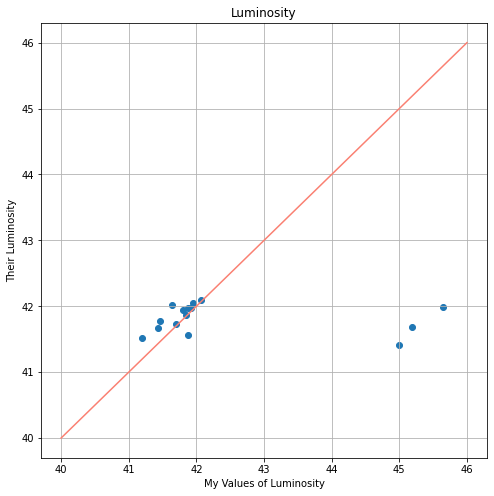

In [70]:
plt.figure(figsize = (8,8))
plt.grid()
# plt.xlim(350,650)
# plt.ylim(350,650)
plt.xlabel('My Values of Luminosity')
plt.ylabel('Their Luminosity')
plt.title('Luminosity')
plt.plot([40,46], [40,46], color = 'salmon')
plt.scatter(np.log10(ha_table_2['L erg/s']), np.log10(ha_table_2['Their Lum']))